# **Computational Methods**
## **Optimization**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
Many of the examples now will use the `humps` function

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6.67]

In [5]:
def humps(x):
    return 1 / ((x - 0.3)**2 + .01) + 1 / ((x - .9)**2 + .04) - 6

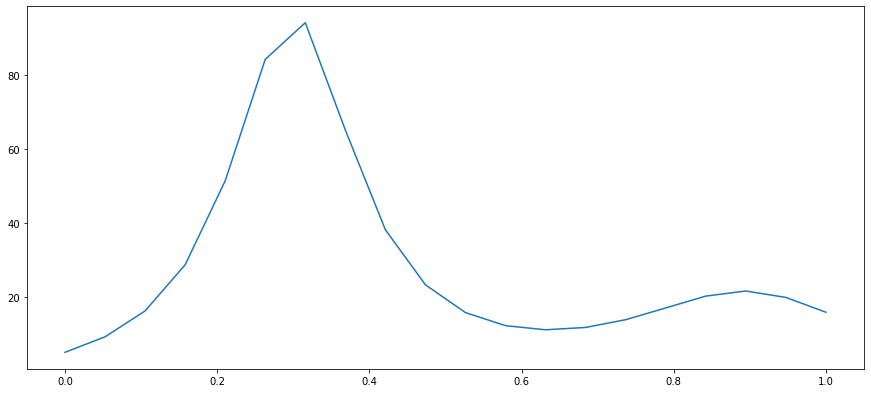

In [10]:
x = np.linspace(0, 1, 20)
y = humps(x)
plt.plot(x, y)
plt.show()

Sometimes we need to pass functions as arguments to other functions. For that we need a way to treat functions as variables.

An example of a "functions function" is [`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar):   \
Let's find roots of a one-dimensional equation (not necessarily polynomial, which we can solve using the function `np.roots()`)

In order to solve the equation we will use the function `root()`. `root()` needs an initial guess.  
Suppose we know that a root exists near `x0 = 1.4` or `x1 = 2` as a second guess.

In [59]:
from scipy.optimize import root
sol = root(humps, x0=1.4)
print(sol)

sol.x

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.46842538e-11])
       r: array([22.01281495])
  status: 1
 success: True
       x: array([1.29954968])


array([1.29954968])

We can also experiment with other initial guesses.

In [62]:
sol = root(humps, x0=6.5)
sol.x

array([1.29954968])

An initial guess of 0.6 will produce another 
root of the function.

In [66]:
sol = root(humps, x0=0.2)
print(sol.x)
sol = root(humps, x0=0)
print(sol.x)

[-0.13161802]
[-0.13161802]


Instead of an initial guess we can give a lower and upper bound on the solution (bracket the solution).

In [70]:
sol = root(humps, (1, 1.5))
sol.x

array([1.29954968, 1.29954968])

The definition of an anonymous function can make use of all the variables defined in the workspace,  
but it only uses their value at the time of definiton!! If they afterwards change, the value in the function
definition is not modified!

TO demonstrate that let's replace the value 0.3 in the definition by 'a', that will first have the
same value.

a = 0.3;
af_humps = @(x) 1./((x-a).^2+0.01)+1./((x-0.9).^2+0.04)-6

If we clear 'a', af_humps will still work, since it used
the value that 'a' had at the definition of af_humps.

af_humps(1)

Changing the value of 'a' also has no effect, as expected.

a = 11.5;
af_humps(1)

af_humps = @(x) 1./((x-a).^2+0.01)+1./((x-0.9).^2+0.04)-6

af_humps(1)

Sometimes we might need the function 'feval' for that.
This is the most trivial example of treating a function as an argument to pass to other functions.

We can simply use the function name and pass it to 'feval' (works both for built-in functions and for 
M-file functions)

af_humps([-1 0 1])
feval(af_humps,[-1 0 1])

We can define cell arrays of function handles:

fhan = {af_humps @sin @cos}

fhan{1}(5)
fhan{2}(pi)

for ii = 1:3
   feval(fhan{ii},5)
end

The function 'functions' provides us with
information about the function handle it 
received as an argument.

functions(fhan{1})
functions(fhan{2})
doc functions

Let's get back to fzero:
The function fzero is part of the 'optimization'
toolbox. A toolbox is a 'package' of functions.
The optimization toolbox is provided as part
of the standard distribution of Matlab.

We can control the way optimization functions work
by an 'options' structure we pass as an input argument.
We can use the function 'optimset' to create this structure.

The input arguments to 'optimset' are pairs of control option
(given as a string) and value.

The control option 'display' controls the level of the printed
output. 'iter' means an output at every iteration of the 
solution algorithm.

opt = optimset('display','iter');
x = fzero(af_humps,[1 1.5],opt)

We can obviously transfer the result of 'optimset'
directly to fzero, without defining the structure
'opt' in our workspace.

x = fzero(af_humps,[1 1.5],optimset('display','iter'))

Other optional values for 'display':

x = fzero(af_humps,[1 1.5],optimset('display','notify'))
x = fzero(af_humps,[1 1.5],optimset('display','off'))
x = fzero(af_humps,[1 1.5],optimset('display','final'));

We can modify several control options.
'tolx' is the tolerance on x - in the solution algorithm,
when x changes by less than 'tolx', the function stops.

x = fzero(af_humps,[1 1.5],optimset('tolx',1e-5,'displ','iter'));

One dimensional optimization. 
--------------------------------------------------
The function 'fminbnd' finds the minimum
value of a one-dimensional function.

ezplot(@humps,[-1 2])

The function needs two bracketing values

[xmin,value] = fminbnd(@humps,0.5,0.8)
[xmin,value] = fminbnd(@humps,0.7,0.8)

The same mechanism for passing control options is used

[xmin,value] = fminbnd(@humps,0.7,0.8,optimset('tolfun',1e-3))
[xmin,value] = fminbnd(@humps,0.5,0.8,optimset('tolfun',1e-3))
[xmin,value] = fminbnd(@humps,0.5,0.8,optimset('tolfun',1e-1))

Multi-dimensional optimization
-----------------------------------------------------
Let's look for the minimum of the Rosenbrock's 'banana' function.
(https://en.wikipedia.org/wiki/Rosenbrock_function)

First let's just plot the 'banana' function.
It's easy to see algebraically that the minimum is at the
location (1,1).

[X,Y] = meshgrid(-1.5:0.125:1.5,-0.6:0.125:2.8);
Z = 100*(Y-X.^2).^2+(1-X).^2;

mesh(X,Y,Z)

For the minimization we will use the function 'fminsearch'
'fminsearch' uses the Nelder-Mead Simplex algorithm.
(https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

We have to define our function. We will define it in the
M file 'banana.m' (attached).

Besides the function name or handle, fminsearch needs also 
an initial guess for x.

[xmin,value] = fminsearch(@banana,[0 0])

[xmin,value] = fminsearch(@banana,[-5 10],optimset('displ','iter'));